# 4.9 : Intro to Data Visualization with Python - TASK 2

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Importing “df_repolished.pkl” data set from the “Prepared Data” folder as "df_pol" by creating a string of the path

path = r'C:\Users\rbhte\OneDrive\Documents\Achievement_4_Monami\Instacart Basket Analysis'
print (path)
print ( '..................................................................................')
# Correctly reading the pickle file
df_pol = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_repolished.pkl'))

print(df_pol.columns)

C:\Users\rbhte\OneDrive\Documents\Achievement_4_Monami\Instacart Basket Analysis
..................................................................................
Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_label', 'busiest_day',
       'day_category', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending_flag', 'order_frequency_flag', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependents',
       'family_status', 'income'],
      dtype='object')


# Creating Bar Charts

<Axes: xlabel='order_day_of_week'>

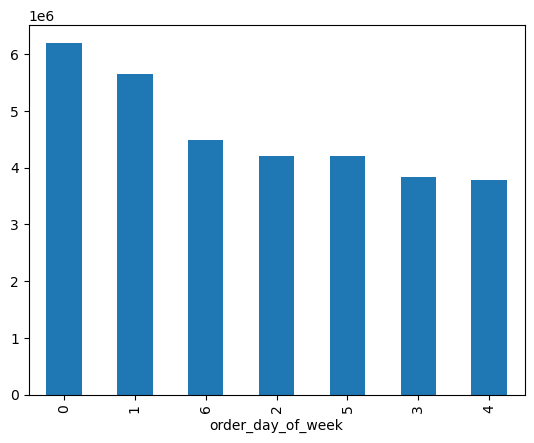

In [4]:
# Create a bar chart
df_pol['order_day_of_week'].value_counts().plot.bar()

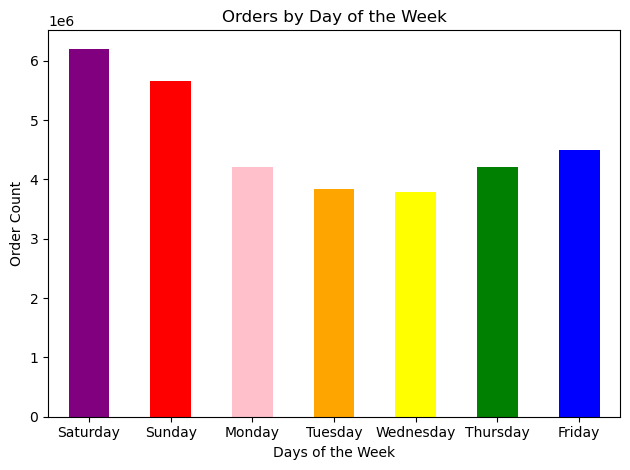

In [7]:
# Define the mapping of numbers to days
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Plot the bar chart
bar_w = df_pol['order_day_of_week'].value_counts().sort_index().plot.bar(
    color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue']
)

# Modify the x-axis labels
bar_w.set_xticklabels(day_names, rotation=0, ha='center')  # Horizontal alignment

# Add labels and title (optional)
bar_w.set_xlabel('Days of the Week')
bar_w.set_ylabel('Order Count')
bar_w.set_title('Orders by Day of the Week')

# Tight layout to prevent clipping
plt.tight_layout()

# Show the chart 
plt.show()

In [8]:
# Exporting the bar chart outside of Jupyter in the form of an image file
# can be done via the figure.savefig() function

bar_w.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_day_of_week.png'))

# Creating Histograms

<Axes: ylabel='Frequency'>

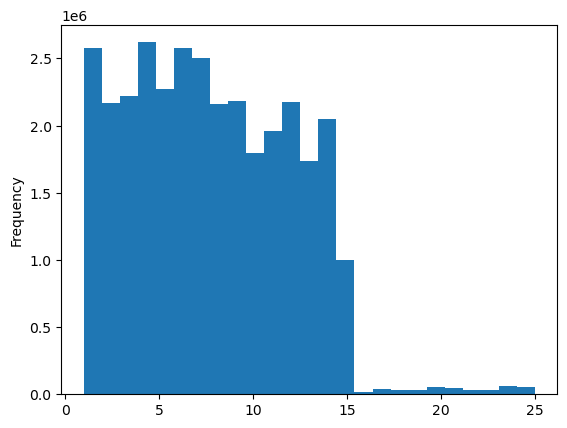

In [9]:
# Creating a histogram of the “prices” column

df_pol['prices'].plot.hist(bins = 25)

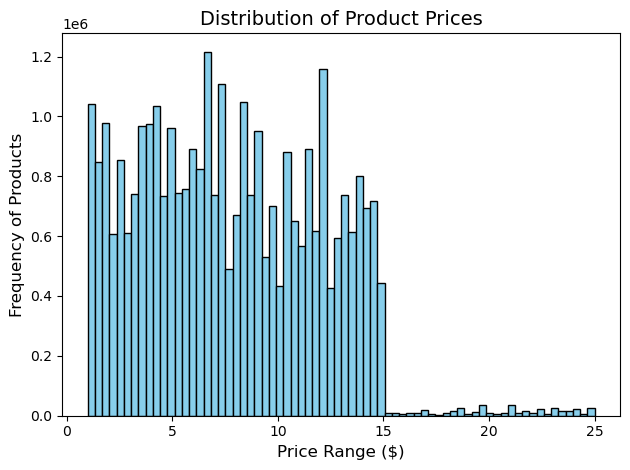

In [10]:
# Creating the histogram
hist_p = df_pol['prices'].plot.hist(bins=70, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Price Range ($)', fontsize=12)  # X-axis label
plt.ylabel('Frequency of Products', fontsize=12)  # Y-axis label
plt.title('Distribution of Product Prices', fontsize=14)  # Histogram title

# Improving layout for better display
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
# Save the histogram as a PNG file 
hist_p.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_prices_histogram.png'))

Increasing the number of bins in the histogram, such as to 70, adds more granular detail by creating thinner columns. This allows for a more precise visualization of the data distribution.

# Creating a Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

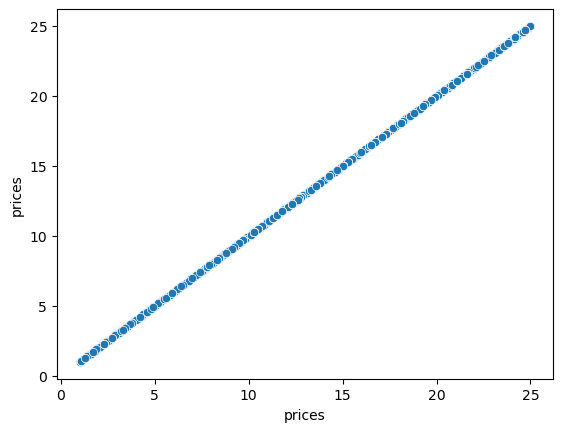

In [12]:
sns.scatterplot(x = 'prices', y = 'prices', data = df_pol)

Plotting the "prices" column against itself in a scatterplot helps visualize the distribution of data points, allowing us to easily spot any outliers. If there are extreme values, they will appear as isolated points far from the cluster of other values.

# Sampling the Data and creating a Line Chart

In [13]:
# Set the seed for the random number generator
np.random.seed(4)

In [14]:
# Create a list holding True/False values to test np.random.rand()<=0.7 
dev = np.random.rand(len(df_pol)) <= 0.7

In [15]:
# Store 70% of the sample in the dataframe big
big = df_pol[dev]

In [16]:
# Store 30% of the sample in the dataframe small
small = df_pol[~dev]

In [17]:
len(df_pol)

32404859

In [18]:
len(big) + len(small)

32404859

In [19]:
# Reduce the data to only the necessary columns, "prices" and "order_day_of_week
df_2 = small[['order_day_of_week','prices']]

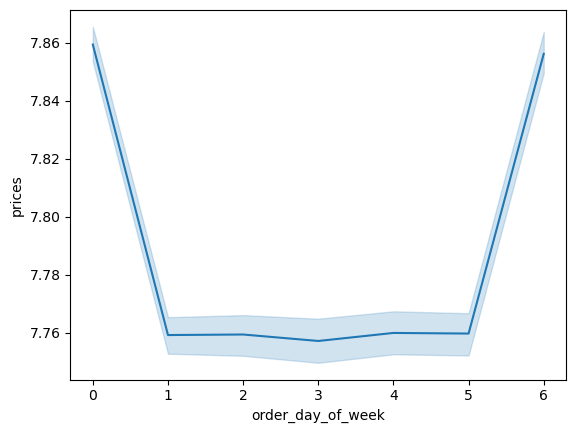

In [20]:
# Finally we are ready to create the line chart using a sample subset
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

# A histogram of the “order_hour_of_day” column

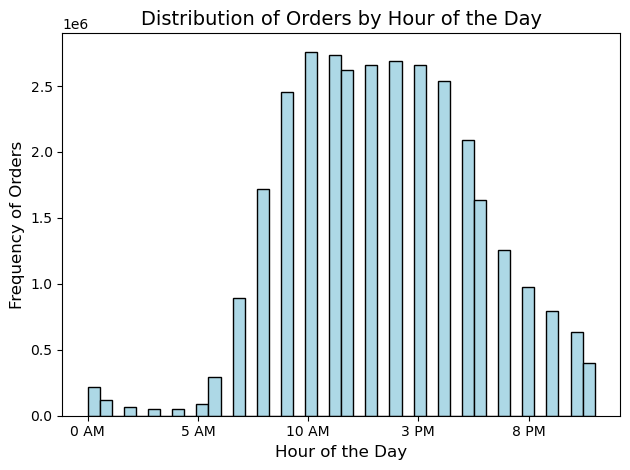

In [22]:
# Creating the histogram
hist_time = df_pol['order_hour_of_day'].plot.hist(bins=42, color='lightblue', edgecolor='black')

# Adding labels and title
plt.title('Distribution of Orders by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Frequency of Orders', fontsize=12)

# Define tick positions and corresponding labels
tick_positions = [0, 5, 10, 15, 20]  # Corresponding to 5 AM, 10 AM, 3 PM, 8 PM
tick_labels = ['0 AM','5 AM', '10 AM', '3 PM', '8 PM']
plt.xticks(tick_positions, tick_labels)

# Improving layout for better display
plt.tight_layout()

# Display the histogram
plt.show()

The busiest order_hour_of_day is 10am with 2761760 orders.
From 8am till 6pm , its generally very busy.

# A Bar Chart of the "loyalty_flag" column

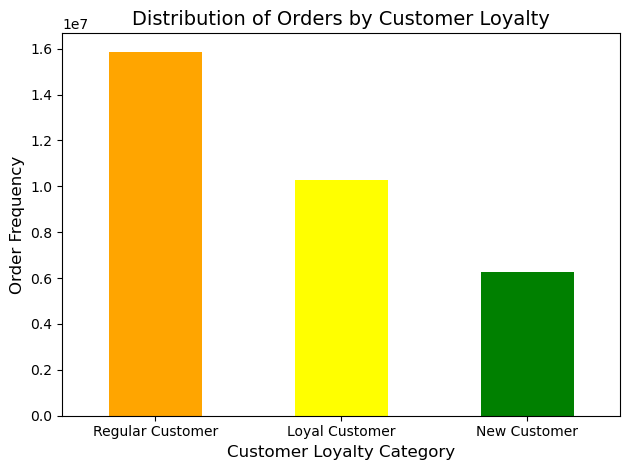

In [23]:
# Creating the bar chart
bar_lc = df_pol['loyalty_flag'].value_counts().plot.bar(color=['orange', 'yellow', 'green'])

# Adding labels and title
plt.title('Distribution of Orders by Customer Loyalty', fontsize=14)
plt.xlabel('Customer Loyalty Category', fontsize=12)
plt.ylabel('Order Frequency', fontsize=12)

# Modify x-axis labels to be horizontal
bar_lc.set_xticklabels(['Regular Customer', 'Loyal Customer', 'New Customer'], rotation=0, ha='center')

# Adjust layout for better visibility
plt.tight_layout()

# Display the chart
plt.show()

# Analysing whether expenditure varies by hour of the day using a sampled dataset

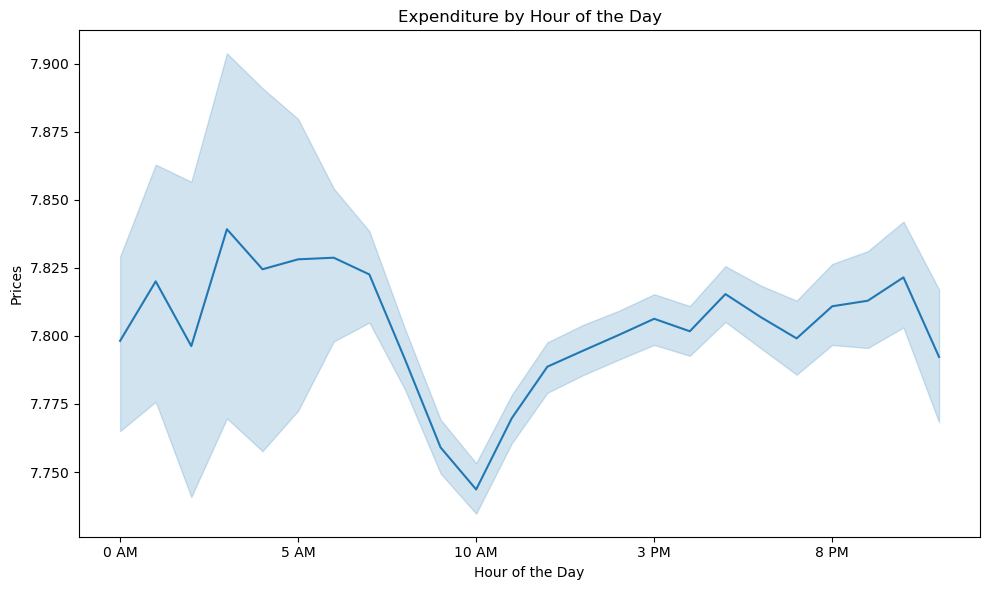

In [25]:
# Set random seed for reproducibility
np.random.seed(4)

# Split data into a 70-30 split for accurate sampling
dev = np.random.rand(len(df_pol)) <= 0.7
big = df_pol[dev]
small = df_pol[~dev]

# Select the necessary columns for analysis
df_sample = small[['order_hour_of_day', 'prices']]

# Create a line chart
plt.figure(figsize=(10, 6))
line1 = sns.lineplot(data=df_sample, x='order_hour_of_day', y='prices')

# Define tick positions and corresponding labels for specific times
tick_positions = [0, 5, 10, 15, 20]  # Corresponding to 5 AM, 10 AM, 3 PM, 8 PM
tick_labels = ['0 AM','5 AM', '10 AM', '3 PM', '8 PM']

# Set x-axis ticks and labels
plt.xticks(tick_positions, tick_labels)

# Adding title and axis labels
line1.set(title="Expenditure by Hour of the Day", xlabel="Hour of the Day", ylabel="Prices")

# Show the plot
plt.tight_layout()
plt.show()

# Analysing the connection between age and family situation (number of dependents) using a line chart

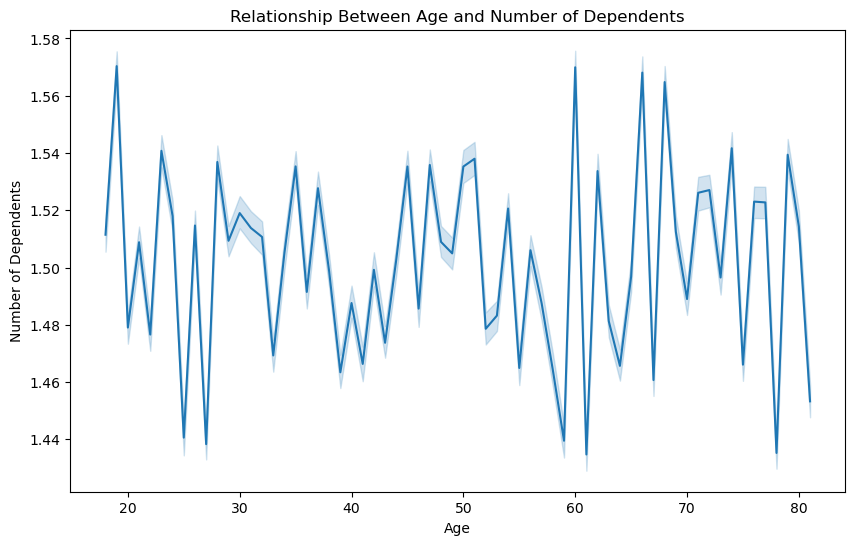

In [26]:
# Select the necessary columns for analysis
df_sample2 = small[['age', 'number_of_dependents']]

# Create a line chart
plt.figure(figsize=(10, 6))
line2 = sns.lineplot(data=df_sample2, x='age', y='number_of_dependents')
line2.set(title="Relationship Between Age and Number of Dependents", xlabel="Age", ylabel="Number of Dependents")
plt.show()

As the line showing the relationship between age and number of dependents fluctuates up and down, it suggests that there isn’t a consistent, linear trend between these variables. This pattern highlights the complexity of family dynamics across age groups.

Life Stages :
The up-and-down pattern reflects different life stages. Younger individuals often have no dependents, middle-aged individuals may have the most due to raising children and older individuals typically see a decline as children become independent.

Family Structures :
Fluctuations also suggest diverse family structures, such as single individuals, larger families, or multigenerational households.

Outliers :
Sharp variations may point to outliers or unique cases where the number of dependents deviates from typical patterns.

# To explore the connection between age and spending power (income) using a scatterplot

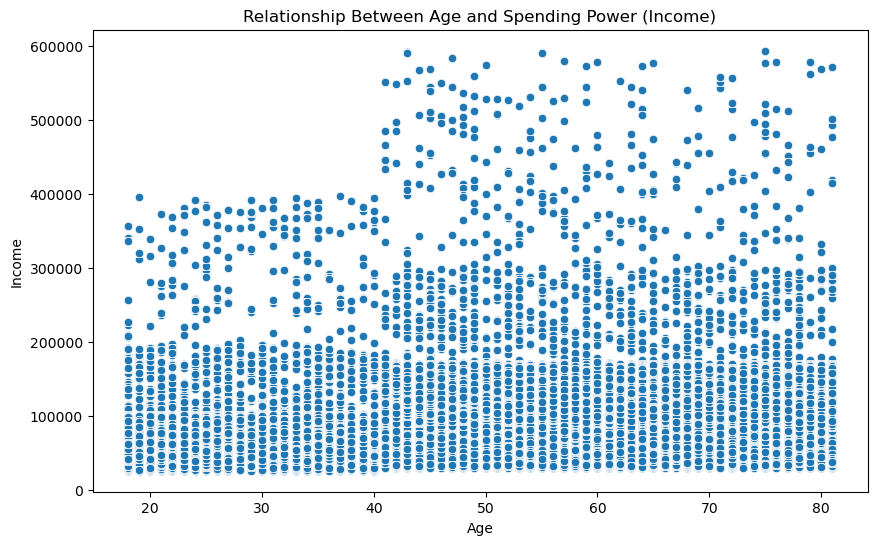

In [27]:
# Create a scatterplot to visualize the relationship between age and income
plt.figure(figsize=(10, 6))
scatter1 = sns.scatterplot(x='age', y='income', data=df_pol)
scatter1.set(title="Relationship Between Age and Spending Power (Income)", xlabel="Age", ylabel="Income")
plt.show()

The scatterplot reveals that most individuals have low income, fewer earn moderate income and only a small group achieves high income, usually at later stages in life. This reflects income inequality and the correlation between age, experience and earnings potential. Further statistical analysis is essential to validate these observations and uncover deeper insights into the relationship between age and income.

# Exporting the visualizations as ".png" file in the relevant project folder

In [28]:
hist_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Distribution_of_orders_by_hour_of_the_day.png'))

In [29]:
bar_lc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Distribution_of_orders_by_customer_loyalty.png'))

In [30]:
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Expenditure_by_hour_of_the_day.png'))

In [31]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Relationship_between_age_and_number_of_dependants.png'))

In [32]:
scatter1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Relationship_between_age_and_spending_power.png'))